### Import libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#load dataset
df = pd.read_csv('data/wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Class label', 'Alcohol', 'Malic acid']

df.head()

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


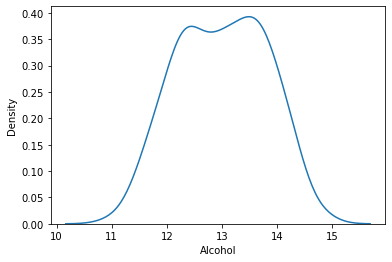

In [7]:
sns.kdeplot(df['Alcohol'])
plt.show()

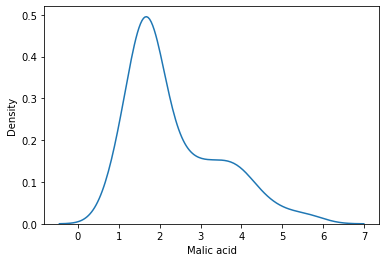

In [9]:
sns.kdeplot(df['Malic acid'])
plt.show()

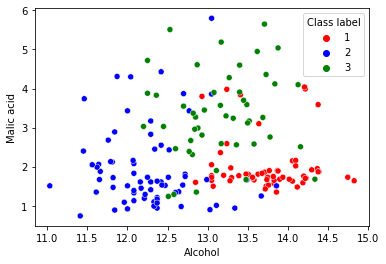

In [11]:
color_dict={1:'red',3:'green',2:'blue'}
sns.scatterplot(x='Alcohol', y='Malic acid', data=df, hue=df['Class label'], palette=color_dict)
plt.show()

### splitting data into train and test set

In [13]:
X = df.drop('Class label', axis=1)
y = df['Class label']

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

X_train.shape, X_test.shape

((142, 2), (36, 2))

### MinMax Scaling

$$
 X_{i} = \frac{X_{i} - X_{min}}{X_{max} - X_{min}}
$$

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the train set
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [17]:
np.round(X_train.describe(), 1)

,Alcohol,Malic acid
count,142.0,142.0
mean,13.0,2.4
std,0.8,1.2
min,11.0,0.9
25%,12.3,1.5
50%,13.0,1.8
75%,13.6,3.2
max,14.8,5.8


In [18]:
np.round(X_train_scaled.describe(), 1)

,Alcohol,Malic acid
count,142.0,142.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.3,0.1
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


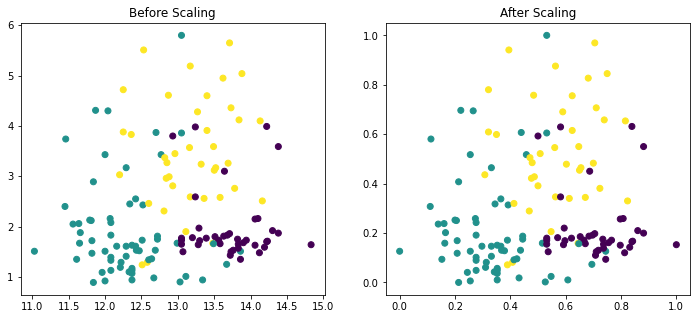

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Alcohol'], X_train['Malic acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

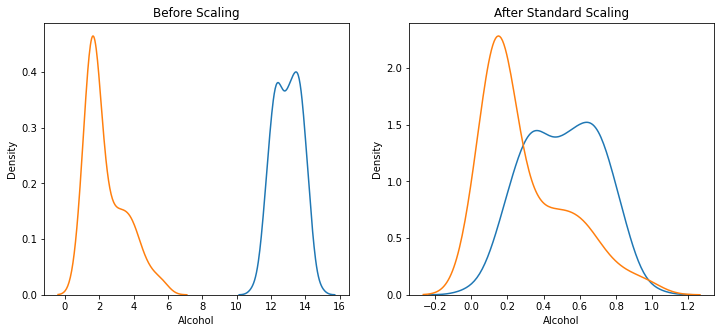

In [20]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

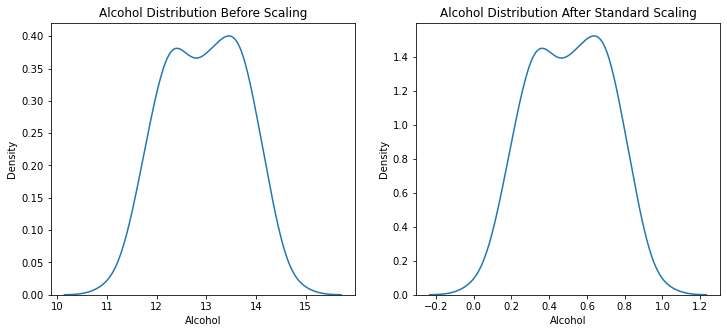

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
plt.show()

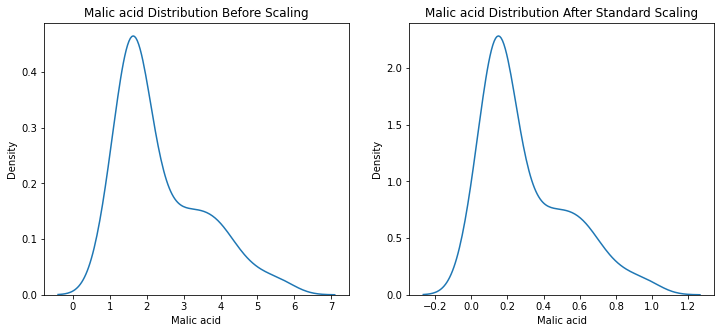

In [22]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Malic acid Distribution Before Scaling')
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('Malic acid Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

### Other types of normalization
* Mean normalization
$$
 X_{i} = \frac{X_{i} - X_{mean}}{X_{max} - X_{min}}
$$
<br>
* MaxAbsScaling
$$
 X_{i} = \frac{X_{i}}{|X_{max}|}
$$
<br>
* RobustScaling
$$
 X_{i} = \frac{X_{i} - X_{median}}{IQR}
$$
where, IQR = Q3 - Q1